In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np
import datetime 
##from datetime import datetime, timezone,timedelta
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
## Phelix et Engie
Index_Phelix = pd.read_excel("Indice Phelix.xlsx", index_col = "Hours cum")
Engie_Price = pd.read_excel("Prix Spot elec opteam.xlsx", index_col = "Hours")

In [3]:
## Data météo
Data_Meteo = pd.read_excel("Données météo.xlsx")
Data_EPEX = pd.read_excel("Prix Spot France Epex.xlsx")

In [4]:
## Data Mix energie RTE
Data_Mix_Energy = pd.read_excel("RTE Mix Energie elec.xlsx", index_col = "Mois")
Data_Conso_Electric = pd.read_excel("RTE conso elec.xlsx")


In [5]:
Data_Carbon_Price = pd.read_excel("Price History_20220704_1155_By_Day.xlsx", sheet_name= "Sheet 1")

# Process Data

# Visualisation des données


In [6]:
Data_Carbon_Price.head(3)

,Exchange Date,Close,Net,%Chg,Open,Low,High,Volume,OI
0,2022-07-01,85.19,-4.59,-0.051125,NaN,NaN,NaN,NaN,10108.0
1,2022-06-30,89.78,1.85,0.021039,87.91,87.91,88.59,218.0,10040.0
2,2022-06-29,87.93,0.95,0.010922,88.63,88.51,89.39,99.0,10040.0


In [7]:
Index_Phelix.head(3)

,Date,Hours,Price\n(€/MWh),Unnamed: 4
Hours cum,,,,
1,2022-06-18,00:00:00,254.24,NaN
2,2022-06-18,01:00:00,209.74,NaN
3,2022-06-18,02:00:00,188.92,NaN


In [8]:
##Index_Phelix[Index_Phelix["Hours"] == "00:00:00\t"]

In [9]:
Engie_Price.head(3)

,Date,Price
Hours,,
00:00:00,2017-01-01,58.82
01:00:00,2017-01-01,58.23
02:00:00,2017-01-01,51.95


In [10]:
Data_Meteo.head(3)

,numer_sta,date,date_r,pmer,tend,cod_tend,dd,ff,t,td,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,20190101000000,20190101,103630.0,-20.0,6.0,310.0,2.6,281.05,278.55,...,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,20190101030000,20190101,103610.0,-30.0,8.0,280.0,2.3,280.15,278.75,...,480.0,8.0,6.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,20190101060000,20190101,103500.0,-100.0,5.0,260.0,2.0,280.25,278.55,...,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
Data_EPEX.head(3)

,Date,Hours,Price
0,2018-01-01,01:00:00,6.74
1,2018-01-01,02:00:00,4.74
2,2018-01-01,03:00:00,3.66


In [12]:
Data_Mix_Energy.head(3)

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique,Pompage,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
Mois,,,,,,,,,,,,,,,,,,,,,
2010-01,Données définitives,France,56542.0,40313.0,8801.0,2928.0,1690.0,4184.0,6307.0,688.0,...,-652.0,-358.0,1297.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,Données définitives,France,50406.0,36316.0,6822.0,1893.0,1175.0,3754.0,5887.0,980.0,...,-497.0,-333.0,1628.0,1752.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03,Données définitives,France,51071.0,35984.0,7250.0,1994.0,1275.0,3981.0,6204.0,1175.0,...,-365.0,-360.0,1784.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
Data_Conso_Electric.head(3)

,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,2018-01-01,00:00:00,61127.0,56800,58900,164.0,36.0,2462.0,42054.0,10799.0,...,5997.0,1624.0,391.0,600.0,291.0,277.0,NaN,NaN,NaN,NaN
1,2018-01-01,00:15:00,NaN,56250,58300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,00:30:00,59962.0,55700,57700,108.0,18.0,2471.0,37564.0,10684.0,...,6100.0,2558.0,212.0,580.0,281.0,258.0,NaN,NaN,NaN,NaN


# Plot

In [14]:
##P rix électricité dans le temps par mois sur 2017 – 2022

In [15]:
Data_EPEX

,Date,Hours,Price
0,2018-01-01,01:00:00,6.74
1,2018-01-01,02:00:00,4.74
2,2018-01-01,03:00:00,3.66
3,2018-01-01,04:00:00,1.26
4,2018-01-01,05:00:00,-20.10
...,...,...,...
36516,2022-02-28,13:00:00,315.51
36517,2022-02-28,14:00:00,296.08
36518,2022-02-28,15:00:00,271.40
36519,2022-02-28,16:00:00,266.70


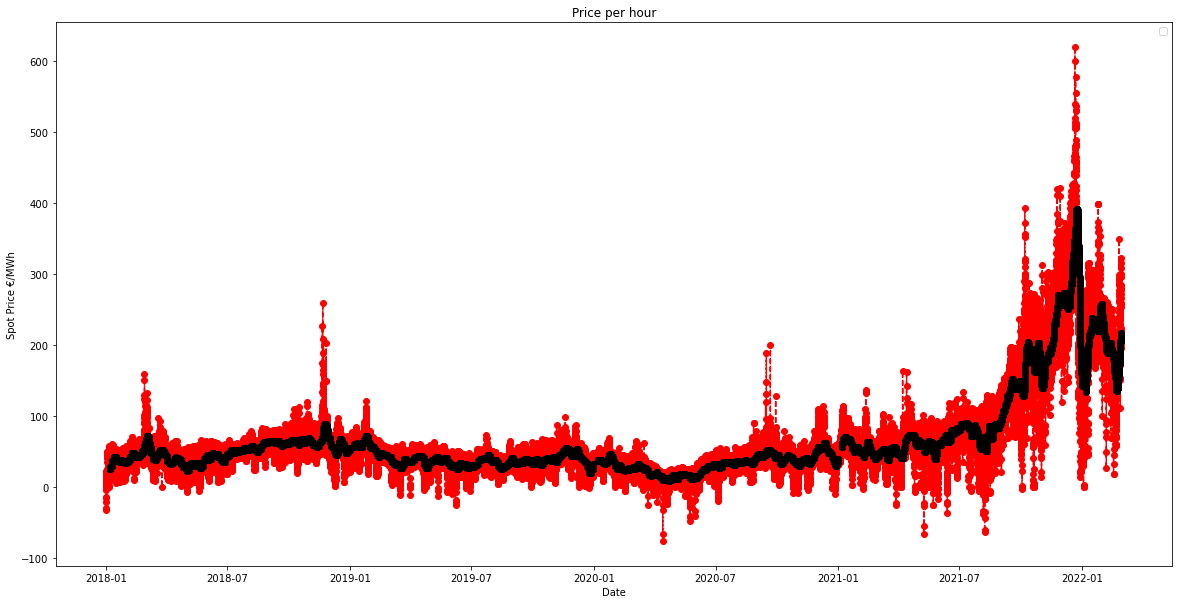

In [16]:
fig = plt.figure(1, figsize=(20, 10))

plt.legend("Spot price")
plt.title("Price per hour")
plt.plot(Data_EPEX["Date"],Data_EPEX["Price"], color = 'r' , marker = 'o',linestyle='dashed')
plt.plot(Data_EPEX["Date"],Data_EPEX["Price"].rolling(150).mean(), color = 'black' , marker = 'o',linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Spot Price €/MWh")
plt.show()

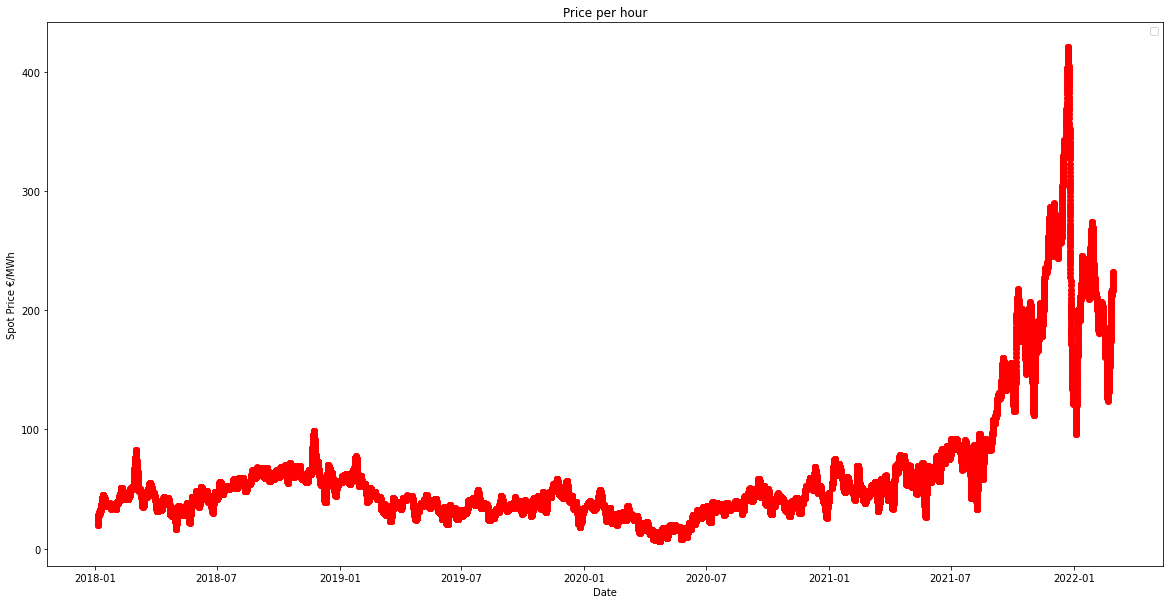

In [17]:
fig = plt.figure(1, figsize=(20, 10))

plt.legend("Spot price")
plt.title("Price per hour")
plt.plot(Data_EPEX["Date"],Data_EPEX["Price"].rolling(100).mean(), color = 'r' , marker = 'o',linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Spot Price €/MWh")
plt.show()

In [18]:
Data_EPEX.describe()

,Price
count,36480.000000
mean,63.224057
std,60.573823
min,-75.820000
25%,33.020000
50%,45.840000
75%,65.480000
max,620.000000


In [19]:
Data_EPEX_day = Data_EPEX.groupby(by = "Date").mean()
Data_EPEX_day = Data_EPEX_day.reset_index()
Data_EPEX_day

,Date,Price
0,2018-01-01,2.661667
1,2018-01-02,32.250417
2,2018-01-03,16.522083
3,2018-01-04,30.698750
4,2018-01-05,34.010417
...,...,...
1515,2022-02-24,187.144583
1516,2022-02-25,245.434583
1517,2022-02-26,243.396250
1518,2022-02-27,196.552917


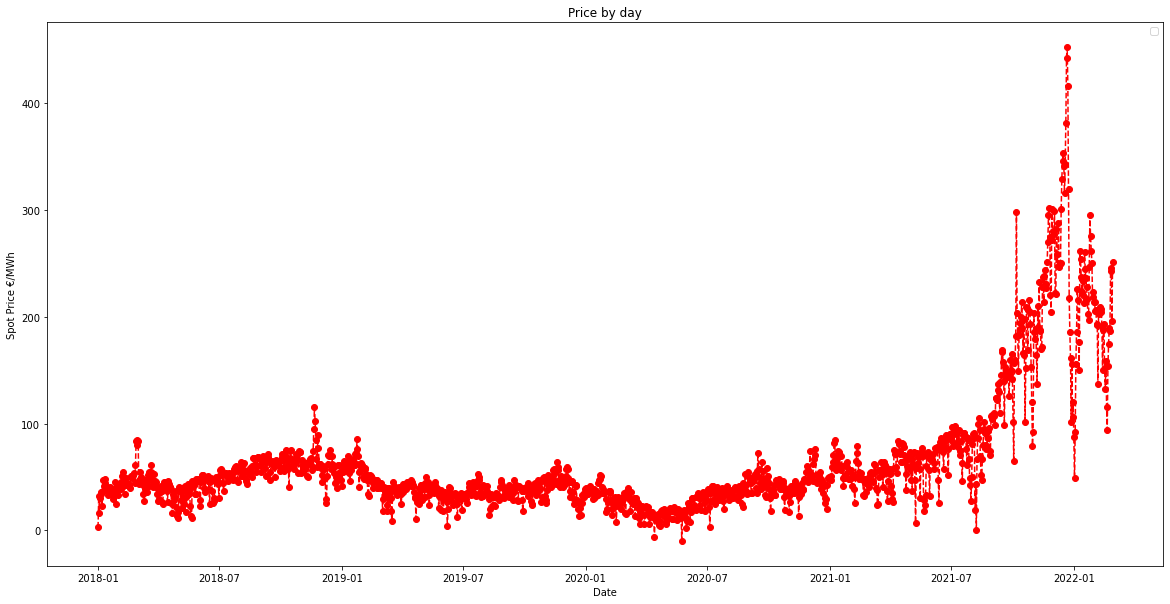

In [20]:
fig = plt.figure(1, figsize=(20, 10))

plt.legend("Spot price")
plt.title("Price by day")
plt.plot(Data_EPEX_day["Date"],Data_EPEX_day["Price"], color = 'r' , marker = 'o',linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Spot Price €/MWh")
plt.show()

In [21]:
# ## Conso électrique

In [22]:
Data_Conso_Electric

,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,2018-01-01,00:00:00,61127.0,56800,58900,164.0,36.0,2462.0,42054.0,10799.0,...,5997.0,1624.0,391.0,600.0,291.0,277.0,NaN,NaN,NaN,NaN
1,2018-01-01,00:15:00,NaN,56250,58300,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,00:30:00,59962.0,55700,57700,108.0,18.0,2471.0,37564.0,10684.0,...,6100.0,2558.0,212.0,580.0,281.0,258.0,NaN,NaN,NaN,NaN
3,2018-01-01,00:45:00,NaN,54800,56750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,01:00:00,57879.0,53900,55800,107.0,17.0,2474.0,35725.0,10660.0,...,6028.0,2364.0,194.0,581.0,279.0,258.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154747,2022-05-31,22:45:00,NaN,45950,46550,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154748,2022-05-31,23:00:00,46703.0,47100,47600,81.0,3.0,3933.0,30437.0,2114.0,...,4394.0,2027.0,2046.0,492.0,393.0,332.0,NaN,NaN,NaN,NaN
154749,2022-05-31,23:15:00,NaN,46750,47250,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154750,2022-05-31,23:30:00,45279.0,46400,46900,82.0,2.0,3748.0,30372.0,2007.0,...,3939.0,1619.0,1826.0,498.0,396.0,333.0,NaN,NaN,NaN,NaN


In [23]:
Data_Conso_Electric_day = Data_Conso_Electric.groupby(by = "Date").mean()

In [24]:
Data_Conso_Electric_day.columns

Index(['Consommation', 'Prévision J-1', 'Prévision J', 'Fioul', 'Charbon',
       'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies', 'Ech. physiques', 'Taux de Co2', 'Ech. comm. Angleterre',
       'Ech. comm. Espagne', 'Ech. comm. Italie', 'Ech. comm. Suisse',
       'Ech. comm. Allemagne-Belgique', 'Fioul - TAC', 'Fioul - Cogén.',
       'Fioul - Autres', 'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG',
       'Gaz - Autres', 'Hydraulique - Fil de l?eau + éclusée',
       'Hydraulique - Lacs', 'Hydraulique - STEP turbinage',
       'Bioénergies - Déchets', 'Bioénergies - Biomasse',
       'Bioénergies - Biogaz', ' Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore'],
      dtype='object')

In [25]:
rnv = ["Consommation","Nucléaire","Eolien", "Solaire", "Hydraulique",'Bioénergies']

In [26]:
Data_Conso_Electric_day_rnv = Data_Conso_Electric_day[rnv]

In [27]:
Data_Conso_Electric_day_rnv.describe()

,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
count,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000,1612.000000
mean,53407.540219,41404.293166,4003.524659,1451.648353,7170.873527,1106.289405
std,10804.891546,6925.550467,2813.814308,730.480330,2208.644259,64.821967
min,35502.312500,22142.854167,371.354167,148.937500,2391.500000,898.854167
25%,45242.328125,37471.875000,1868.541667,817.942708,5444.677083,1064.359375
50%,50199.833333,41240.083333,3187.947917,1428.875000,7148.218750,1110.041667
75%,61814.489583,45353.015625,5516.411458,2006.921875,8815.864583,1149.302083
max,89600.083333,58269.875000,15011.833333,3773.750000,13299.041667,1323.208333


In [28]:
Data_Conso_Electric_day_rnv

,Consommation,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies
Date,,,,,,
2018-01-01,56302.041667,39178.145833,9768.562500,315.937500,7770.125000,1085.020833
2018-01-02,63102.958333,52531.187500,7132.666667,242.958333,8929.187500,1057.479167
2018-01-03,63761.270833,52614.104167,9857.895833,240.979167,8904.937500,1042.562500
2018-01-04,63169.187500,52792.145833,9021.541667,246.562500,9397.729167,1093.750000
2018-01-05,62318.708333,53464.770833,5334.791667,347.437500,9446.541667,1078.083333
...,...,...,...,...,...,...
2022-05-27,40620.354167,25635.895833,2981.208333,2937.562500,6011.312500,1259.729167
2022-05-28,38766.583333,26370.041667,3871.312500,3731.895833,5379.458333,1259.458333
2022-05-29,38017.583333,26243.666667,4113.354167,3773.750000,4888.583333,1259.000000


# Conso et production

<AxesSubplot:title={'center':'Electricity consumption breakdown by day'}, xlabel='Date', ylabel='KWh'>

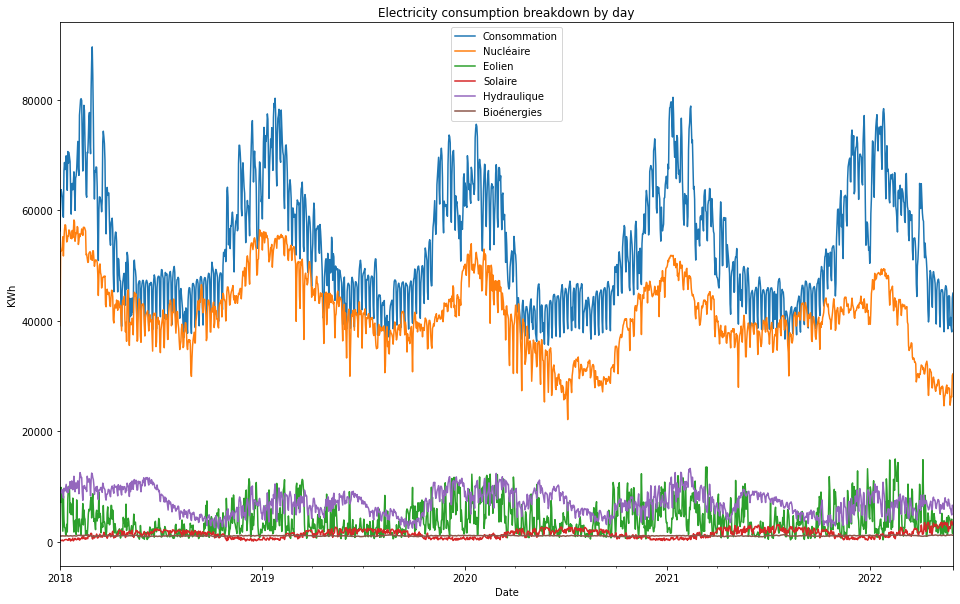

In [29]:
Data_Conso_Electric_day_rnv.plot(xlabel = "Date", ylabel = "KWh", title = 'Electricity consumption breakdown by day', figsize = (16,10))

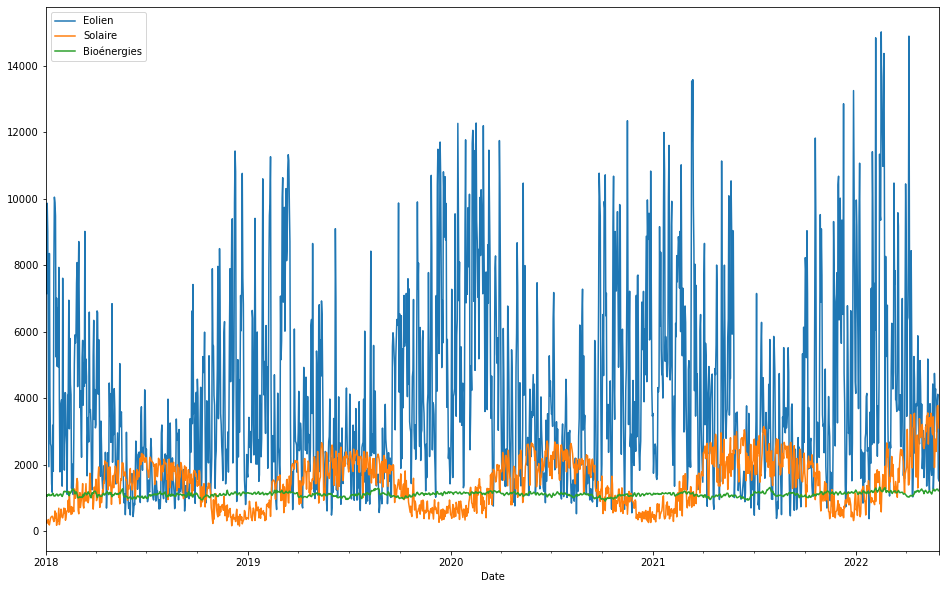

In [30]:
Data_rnv_hours = Data_Conso_Electric_day[["Eolien", "Solaire",'Bioénergies']]
Data_rnv_hours.plot(figsize = (16,10))
plt.legend()

In [31]:
### Production 

In [32]:
Columns_enr= ['Production éolien', 'Production solaire', 'Production bioénergies']

In [33]:

Data_Mix_Energy.columns

Index(['Qualité', 'Territoire', 'Production totale', 'Production nucléaire',
       'Production thermique totale', 'Production thermique charbon',
       'Production thermique fioul', 'Production thermique gaz',
       'Production hydraulique', 'Production éolien', 'Production solaire',
       'Production bioénergies', 'Consommation totale', 'Solde exportateur',
       'Echanges export', 'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique',
       'Pompage', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore'],
      dtype='object')

In [34]:
##Data_Mix_Energy = Data_Mix_Energy.fillna(method='ffill')

In [35]:
Data_Mix_Energy = Data_Mix_Energy.fillna(Data_Mix_Energy.interpolate())

<AxesSubplot:title={'center':'Production ENR '}, xlabel='Mois', ylabel='kWh'>

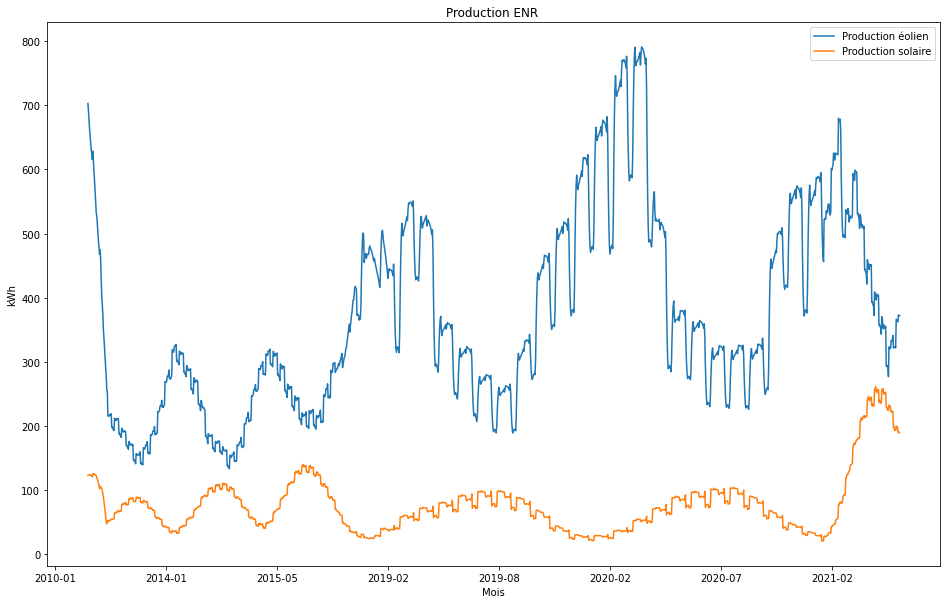

In [36]:
Data_Mix_Enr = Data_Mix_Energy[Columns_enr]
Data_Mix_Enr['Production éolien'].rolling(60).mean().plot(ylabel = "kWh", title = "Production ENR ",legend = "wind turbin",figsize = (16,10))
Data_Mix_Enr['Production solaire'].rolling(60).mean().plot(legend = "wind turbin",figsize = (16,10))

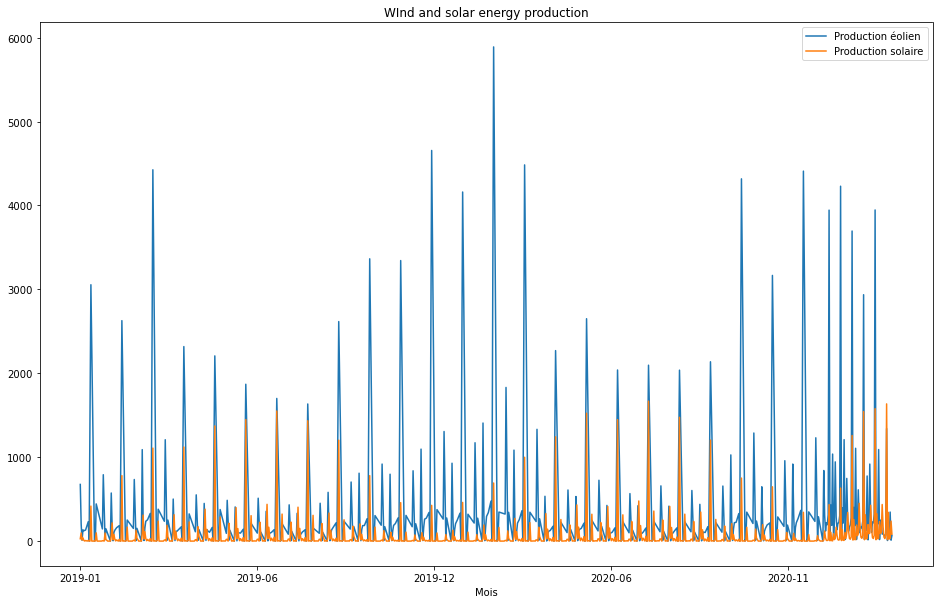

In [37]:
Data_Mix_Enr = Data_Mix_Energy[Columns_enr]
Data_Mix_Enr['Production éolien']["2019-01":"2021-06"].plot(figsize = (16,10), title = 'WInd and solar energy production')
Data_Mix_Enr['Production solaire']["2019-01":"2021-06"].plot(figsize = (16,10))
plt.legend()

In [38]:
Data_Mix_Energy

,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,...,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique,Pompage,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
Mois,,,,,,,,,,,,,,,,,,,,,
2010-01,Données définitives,France,56542.0,40313.0,8801.0,2928.0,1690.0,4184.0,6307.0,688.0,...,-652.0,-358.0,1297.0,1613.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,Données définitives,France,50406.0,36316.0,6822.0,1893.0,1175.0,3754.0,5887.0,980.0,...,-497.0,-333.0,1628.0,1752.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-03,Données définitives,France,51071.0,35984.0,7250.0,1994.0,1275.0,3981.0,6204.0,1175.0,...,-365.0,-360.0,1784.0,2022.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-04,Données définitives,France,41693.0,31294.0,3568.0,1489.0,612.0,1467.0,5684.0,731.0,...,67.0,-337.0,1522.0,1900.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-05,Données définitives,France,39847.0,29372.0,2843.0,1097.0,504.0,1242.0,6428.0,743.0,...,486.0,-147.0,1229.0,1287.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11,Données consolidées,Occitanie,2142.0,897.0,59.0,-0.5,0.0,59.0,638.0,347.0,...,-160.0,-841.0,1045.0,1513.0,-2233.0,-9.0,NaN,NaN,NaN,NaN
2021-11,Données consolidées,Normandie,5376.0,4929.0,239.0,-1.0,31.0,208.0,5.0,134.0,...,-160.0,-841.0,1045.0,1513.0,-2233.0,-9.0,NaN,NaN,NaN,NaN
2021-11,Données consolidées,Hauts-de-France,4319.0,2265.0,1239.0,0.0,5.0,1233.0,1.0,720.0,...,-160.0,-841.0,1045.0,1513.0,-2233.0,-9.0,NaN,NaN,NaN,NaN


In [39]:
Data_Mix_Enr

,Production éolien,Production solaire,Production bioénergies
Mois,,,
2010-01,688.0,10.0,423.0
2010-02,980.0,16.0,386.0
2010-03,1175.0,31.0,428.0
2010-04,731.0,45.0,370.0
2010-05,743.0,54.0,408.0
...,...,...,...
2021-11,347.0,138.0,60.0
2021-11,134.0,9.0,58.0
2021-11,720.0,11.0,80.0


In [40]:
## Indice Phelix


In [41]:
Index_Phelix

,Date,Hours,Price\n(€/MWh),Unnamed: 4
Hours cum,,,,
1,2022-06-18,00:00:00,254.24,NaN
2,2022-06-18,01:00:00,209.74,NaN
3,2022-06-18,02:00:00,188.92,NaN
4,2022-06-18,03:00:00,182.54,NaN
5,2022-06-18,04:00:00,174.16,NaN
...,...,...,...,...
212,2022-06-26,19:00:00,324.99,NaN
213,2022-06-26,20:00:00,333.28,NaN
214,2022-06-26,21:00:00,333.87,NaN


<AxesSubplot:title={'center':'Phelix Index'}, xlabel='Hours cum', ylabel='spot price €/MWh'>

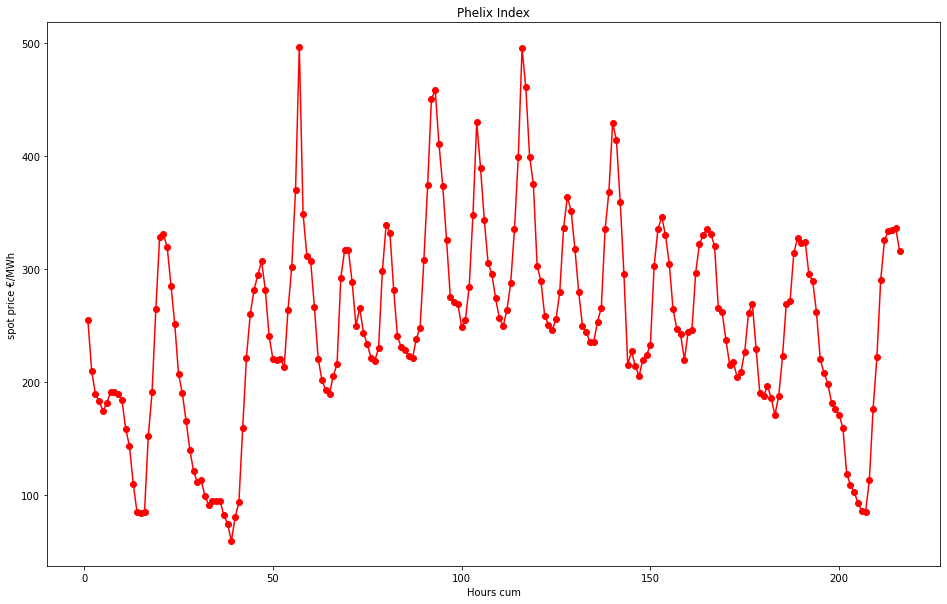

In [42]:
Index_Phelix["Price\n(€/MWh)"].plot(ylabel = "spot price €/MWh", title = "Phelix Index",color = 'r' , marker = 'o', figsize = (16,10))

(array([0.00179993, 0.0009529 , 0.00232932, 0.00455276, 0.00476452,
        0.00370574, 0.00296459, 0.00084703, 0.00052939, 0.00042351]),
 array([ 59.01 , 102.736, 146.462, 190.188, 233.914, 277.64 , 321.366,
        365.092, 408.818, 452.544, 496.27 ]),
 [<matplotlib.patches.Polygon at 0x17b283935b0>])

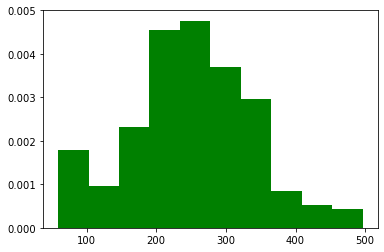

In [43]:
plt.hist(Index_Phelix["Price\n(€/MWh)"], density=True, bins = 10, color = 'green', histtype = 'stepfilled')

# plt.hist(Data_EPEX['Price'])

# Data Meteo

In [44]:
Data_Meteo

,numer_sta,date,date_r,pmer,tend,cod_tend,dd,ff,t,td,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,20190101000000,20190101,103630.0,-20.0,6.0,310.0,2.6,281.05,278.55,...,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,20190101030000,20190101,103610.0,-30.0,8.0,280.0,2.3,280.15,278.75,...,480.0,8.0,6.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,20190101060000,20190101,103500.0,-100.0,5.0,260.0,2.0,280.25,278.55,...,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7149,20190101090000,20190101,103510.0,10.0,0.0,310.0,2.3,280.95,278.45,...,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,20190101120000,20190101,103470.0,-40.0,8.0,330.0,3.4,281.25,277.45,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10380,7149,20220622210000,20220622,101050.0,100.0,3.0,100.0,2.9,294.95,290.35,...,1050.0,7.0,NaN,1410.0,7.0,NaN,1800.0,NaN,9.0,NaN
10381,7149,20220623000000,20220623,101060.0,0.0,0.0,90.0,1.4,292.45,290.95,...,570.0,8.0,NaN,750.0,NaN,9.0,NaN,NaN,NaN,NaN
10382,7149,20220623030000,20220623,101040.0,-20.0,6.0,200.0,3.1,291.45,290.25,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10383,7149,20220623060000,20220623,101140.0,100.0,1.0,220.0,3.6,291.85,288.95,...,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
def change_date(date) :
    
    date_car = str(date)
    année = date_car[0:4] 
    mois=date_car[4:6]
    jours = date_car[6:8]
    heures = date_car[8:10]
    minutes = date_car[10:12]
    
    DATE = année + "-" + mois + "-" + jours + " " + heures + ":00:00"
    date = pd.to_datetime(DATE)
    
    return date

In [46]:
test_date = change_date(20220622210000)
test_date

Timestamp('2022-06-22 21:00:00')

In [47]:
Data_Meteo_reshape = Data_Meteo.fillna(method='ffill')

In [48]:
funct = np.vectorize(change_date,otypes=[np.str0])
Data_Meteo_reshape["Date Reshape"] = funct(Data_Meteo["date"])  

In [49]:
Data_Meteo_reshape["Date Reshape"]

0        2019-01-01 00:00:00
1        2019-01-01 03:00:00
2        2019-01-01 06:00:00
3        2019-01-01 09:00:00
4        2019-01-01 12:00:00
                ...         
10380    2022-06-22 21:00:00
10381    2022-06-23 00:00:00
10382    2022-06-23 03:00:00
10383    2022-06-23 06:00:00
10384    2022-06-23 09:00:00
Name: Date Reshape, Length: 10385, dtype: object

In [50]:
Data_Meteo_reshape["t celsius"] = Data_Meteo["t"]-273.15

In [51]:
Data_Meteo_reshape["t celsius"]

0         7.9
1         7.0
2         7.1
3         7.8
4         8.1
         ... 
10380    21.8
10381    19.3
10382    18.3
10383    18.7
10384    23.2
Name: t celsius, Length: 10385, dtype: float64

In [52]:
Data_Meteo_reshape

,numer_sta,date,date_r,pmer,tend,cod_tend,dd,ff,t,td,...,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Date Reshape,t celsius
0,7149,20190101000000,20190101,103630.0,-20.0,6.0,310.0,2.6,281.05,278.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,7.9
1,7149,20190101030000,20190101,103610.0,-30.0,8.0,280.0,2.3,280.15,278.75,...,6.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 03:00:00,7.0
2,7149,20190101060000,20190101,103500.0,-100.0,5.0,260.0,2.0,280.25,278.55,...,6.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 06:00:00,7.1
3,7149,20190101090000,20190101,103510.0,10.0,0.0,310.0,2.3,280.95,278.45,...,6.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 09:00:00,7.8
4,7149,20190101120000,20190101,103470.0,-40.0,8.0,330.0,3.4,281.25,277.45,...,6.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 12:00:00,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10380,7149,20220622210000,20220622,101050.0,100.0,3.0,100.0,2.9,294.95,290.35,...,3.0,1410.0,7.0,0.0,1800.0,1.0,9.0,1500.0,2022-06-22 21:00:00,21.8
10381,7149,20220623000000,20220623,101060.0,0.0,0.0,90.0,1.4,292.45,290.95,...,3.0,750.0,7.0,9.0,1800.0,1.0,9.0,1500.0,2022-06-23 00:00:00,19.3
10382,7149,20220623030000,20220623,101040.0,-20.0,6.0,200.0,3.1,291.45,290.25,...,3.0,750.0,7.0,9.0,1800.0,1.0,9.0,1500.0,2022-06-23 03:00:00,18.3
10383,7149,20220623060000,20220623,101140.0,100.0,1.0,220.0,3.6,291.85,288.95,...,3.0,750.0,7.0,9.0,1800.0,1.0,9.0,1500.0,2022-06-23 06:00:00,18.7


In [53]:
Data_Meteo_reshape.columns

Index(['numer_sta', 'date', 'date_r', 'pmer', 'tend', 'cod_tend', 'dd', 'ff',
       't', 'td', 'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm',
       'ch', 'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12',
       'tx24', 'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol',
       'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24',
       'phenspe1', 'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1',
       'hnuage1', 'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3',
       'hnuage3', 'nnuage4', 'ctype4', 'hnuage4', 'Date Reshape', 't celsius'],
      dtype='object')

In [54]:
## Numer_Sta station 7005 Paris
##ff vitesse du vent
##rrN Précipitation
##n nébulosité totale
##dd direction du vent 
## rafper rafales sur période

colonnes_meteo = ['Date Reshape','t celsius','ff','n','dd','rafper']

In [55]:
Data_Meteo_res=Data_Meteo_reshape[colonnes_meteo]

In [56]:
Data_Meteo_res = Data_Meteo_res.set_index('Date Reshape')

<AxesSubplot:title={'center':'température by day '}, xlabel='Date Reshape', ylabel='temperature °c '>

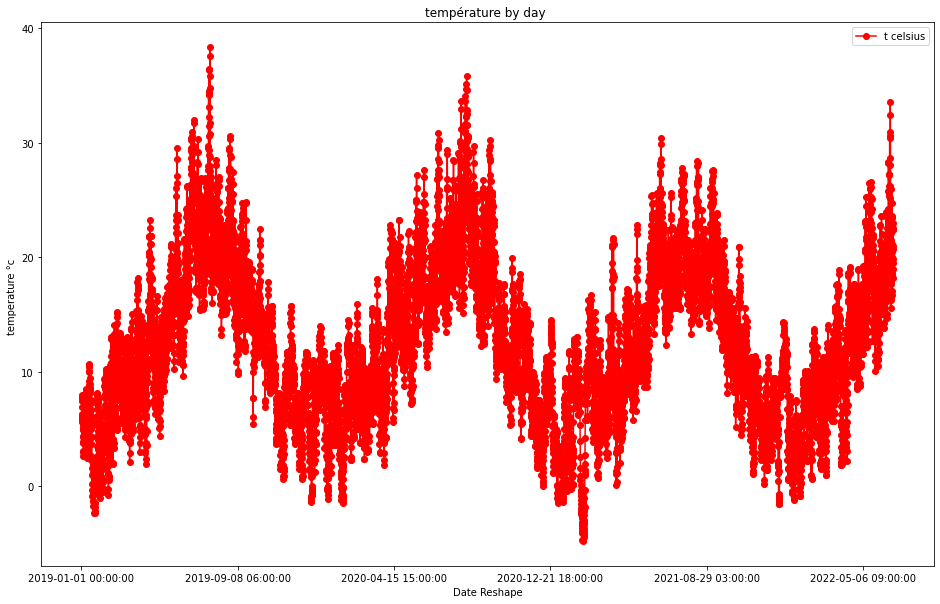

In [57]:
Data_Meteo_res['t celsius'].rolling(4).mean().plot(ylabel = "temperature °c ", title = "température by day ",legend = "'t celsius'",color = 'r' , marker = 'o',figsize = (16,10))
##Data_Meteo_res['Production solaire'].rolling(60).mean().plot(legend = "wind turbin",figsize = (16,10))

<AxesSubplot:title={'center':'Wind Graph'}, xlabel='Date Reshape', ylabel='Wind speed '>

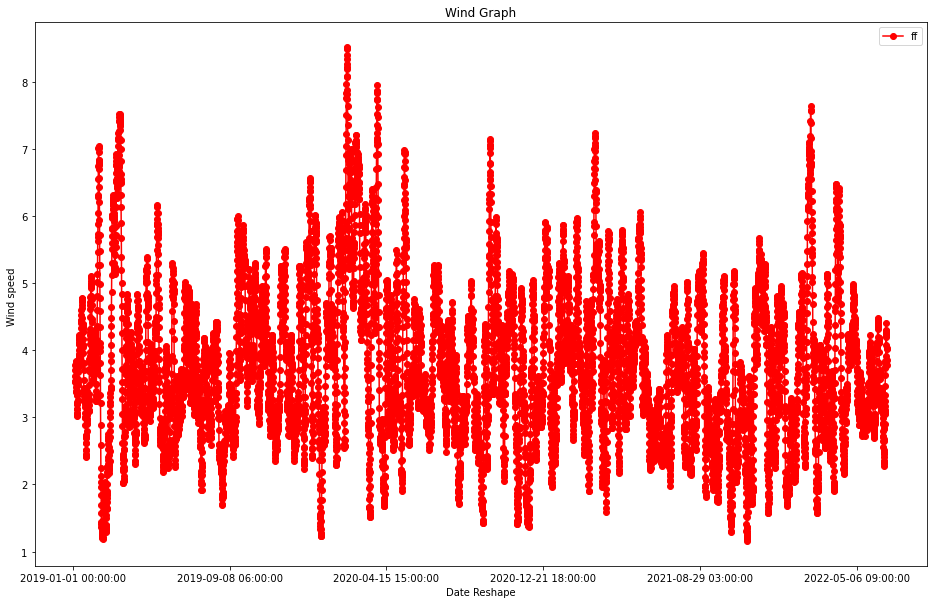

In [58]:
Data_Meteo_res['ff'].rolling(30).mean().plot(ylabel = "Wind speed ", title = "Wind Graph",legend = "Wind speed",color = 'r' , marker = 'o',figsize = (16,10))



<AxesSubplot:title={'center':'wind '}, xlabel='Date Reshape', ylabel='wind raf '>

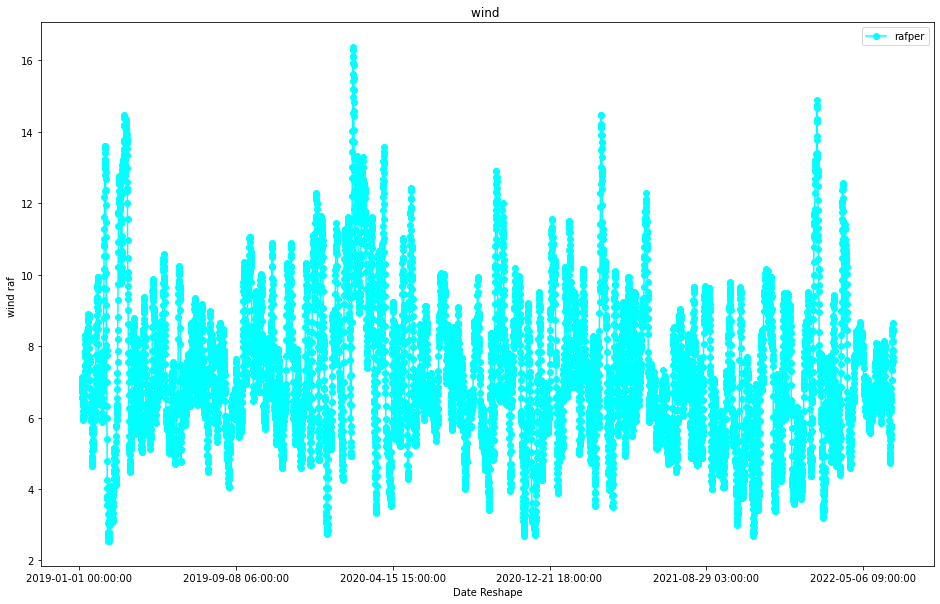

In [59]:
Data_Meteo_res['rafper'].rolling(30).mean().plot(ylabel = "wind raf ", title = "wind ",legend = "raf perd",color = 'cyan' , marker = 'o',figsize = (16,10))

In [60]:
Data_Meteo

,numer_sta,date,date_r,pmer,tend,cod_tend,dd,ff,t,td,...,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4
0,7149,20190101000000,20190101,103630.0,-20.0,6.0,310.0,2.6,281.05,278.55,...,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7149,20190101030000,20190101,103610.0,-30.0,8.0,280.0,2.3,280.15,278.75,...,480.0,8.0,6.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN
2,7149,20190101060000,20190101,103500.0,-100.0,5.0,260.0,2.0,280.25,278.55,...,630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7149,20190101090000,20190101,103510.0,10.0,0.0,310.0,2.3,280.95,278.45,...,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7149,20190101120000,20190101,103470.0,-40.0,8.0,330.0,3.4,281.25,277.45,...,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10380,7149,20220622210000,20220622,101050.0,100.0,3.0,100.0,2.9,294.95,290.35,...,1050.0,7.0,NaN,1410.0,7.0,NaN,1800.0,NaN,9.0,NaN
10381,7149,20220623000000,20220623,101060.0,0.0,0.0,90.0,1.4,292.45,290.95,...,570.0,8.0,NaN,750.0,NaN,9.0,NaN,NaN,NaN,NaN
10382,7149,20220623030000,20220623,101040.0,-20.0,6.0,200.0,3.1,291.45,290.25,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10383,7149,20220623060000,20220623,101140.0,100.0,1.0,220.0,3.6,291.85,288.95,...,390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
## Numer_Sta station 7005 Paris
##ff vitesse du vent
##rrN Précipitation
##n nébulosité totale
##dd direction du vent 
## rafper rafales sur période

# Times series Prevision

In [62]:
Index_Phelix

,Date,Hours,Price\n(€/MWh),Unnamed: 4
Hours cum,,,,
1,2022-06-18,00:00:00,254.24,NaN
2,2022-06-18,01:00:00,209.74,NaN
3,2022-06-18,02:00:00,188.92,NaN
4,2022-06-18,03:00:00,182.54,NaN
5,2022-06-18,04:00:00,174.16,NaN
...,...,...,...,...
212,2022-06-26,19:00:00,324.99,NaN
213,2022-06-26,20:00:00,333.28,NaN
214,2022-06-26,21:00:00,333.87,NaN


In [63]:
Data_EPEX

,Date,Hours,Price
0,2018-01-01,01:00:00,6.74
1,2018-01-01,02:00:00,4.74
2,2018-01-01,03:00:00,3.66
3,2018-01-01,04:00:00,1.26
4,2018-01-01,05:00:00,-20.10
...,...,...,...
36516,2022-02-28,13:00:00,315.51
36517,2022-02-28,14:00:00,296.08
36518,2022-02-28,15:00:00,271.40
36519,2022-02-28,16:00:00,266.70


In [64]:
Data_EPEX_day

,Date,Price
0,2018-01-01,2.661667
1,2018-01-02,32.250417
2,2018-01-03,16.522083
3,2018-01-04,30.698750
4,2018-01-05,34.010417
...,...,...
1515,2022-02-24,187.144583
1516,2022-02-25,245.434583
1517,2022-02-26,243.396250
1518,2022-02-27,196.552917


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
len_train = int(0.8 * len(Data_EPEX_day))
len_train

1216

In [67]:
Data_EPEX_day

,Date,Price
0,2018-01-01,2.661667
1,2018-01-02,32.250417
2,2018-01-03,16.522083
3,2018-01-04,30.698750
4,2018-01-05,34.010417
...,...,...
1515,2022-02-24,187.144583
1516,2022-02-25,245.434583
1517,2022-02-26,243.396250
1518,2022-02-27,196.552917


In [68]:
train = Data_EPEX_day[0:len_train]
test = Data_EPEX_day[len_train:]

<Figure size 1296x720 with 0 Axes>

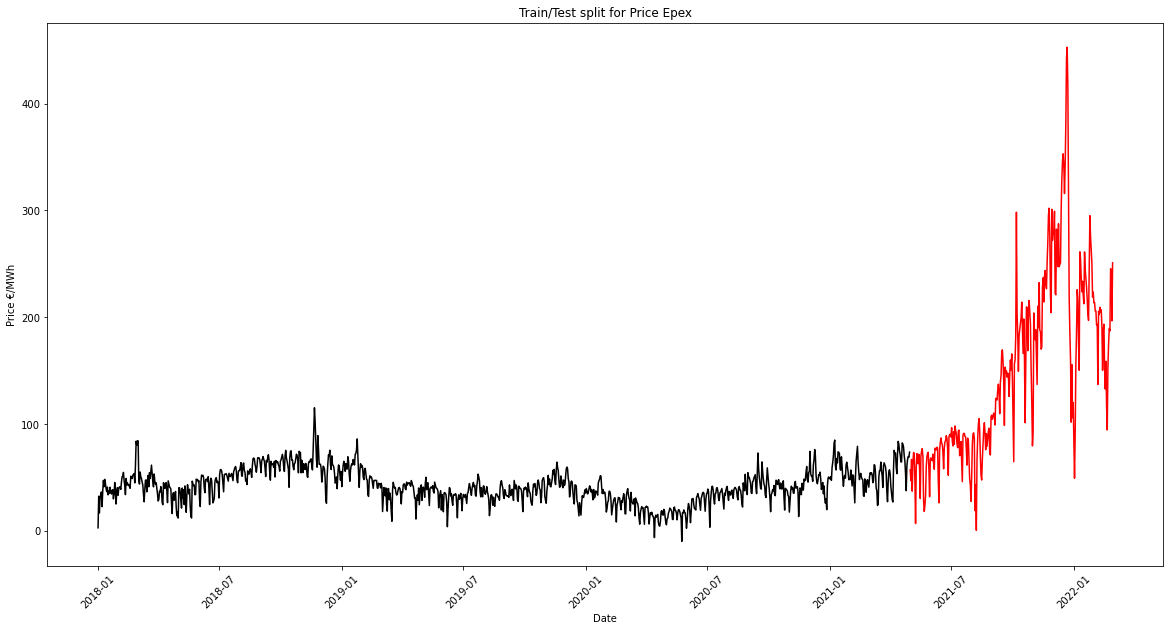

<Figure size 1296x720 with 0 Axes>

In [69]:
fig = plt.figure(1, figsize=(20, 10))

plt.plot(train['Date'],train['Price'], color = "black")
plt.plot(test['Date'],test['Price'], color = "red")
plt.ylabel('Price €/MWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Price Epex")
plt.figure(figsize=(18,10))

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [71]:
y = train['Price']
ARMAmodel = SARIMAX(y, order = (2, 2, 2))
ARMAmodel = ARMAmodel.fit()

C:\Users\KL6269\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


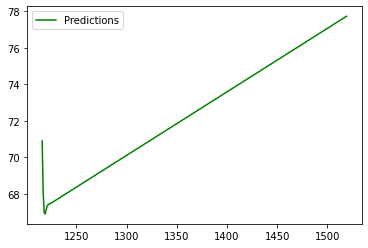

In [72]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [73]:
y 

0        2.661667
1       32.250417
2       16.522083
3       30.698750
4       34.010417
          ...    
1211    60.653333
1212    66.556250
1213    69.432500
1214    68.723333
1215    73.577083
Name: Price, Length: 1216, dtype: float64

In [74]:
y_pred_out

1216    70.902161
1217    68.111660
1218    66.971514
1219    66.906579
1220    67.147034
          ...    
1515    77.598477
1516    77.633297
1517    77.668118
1518    77.702939
1519    77.737759
Name: Predictions, Length: 304, dtype: float64

C:\Users\KL6269\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


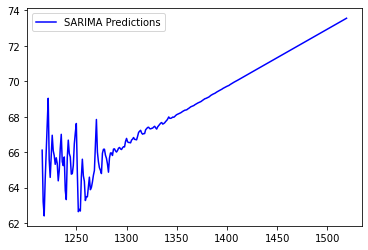

In [75]:
SARIMAXmodel = SARIMAX(y,order= (2,2,2) , seasonal_order = (5,0,0,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.005) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [76]:
y_pred_out

1216    66.107882
1217    63.195759
1218    62.398476
1219    64.438151
1220    66.031313
          ...    
1515    73.421226
1516    73.453446
1517    73.485680
1518    73.517919
1519    73.550196
Name: Predictions, Length: 304, dtype: float64

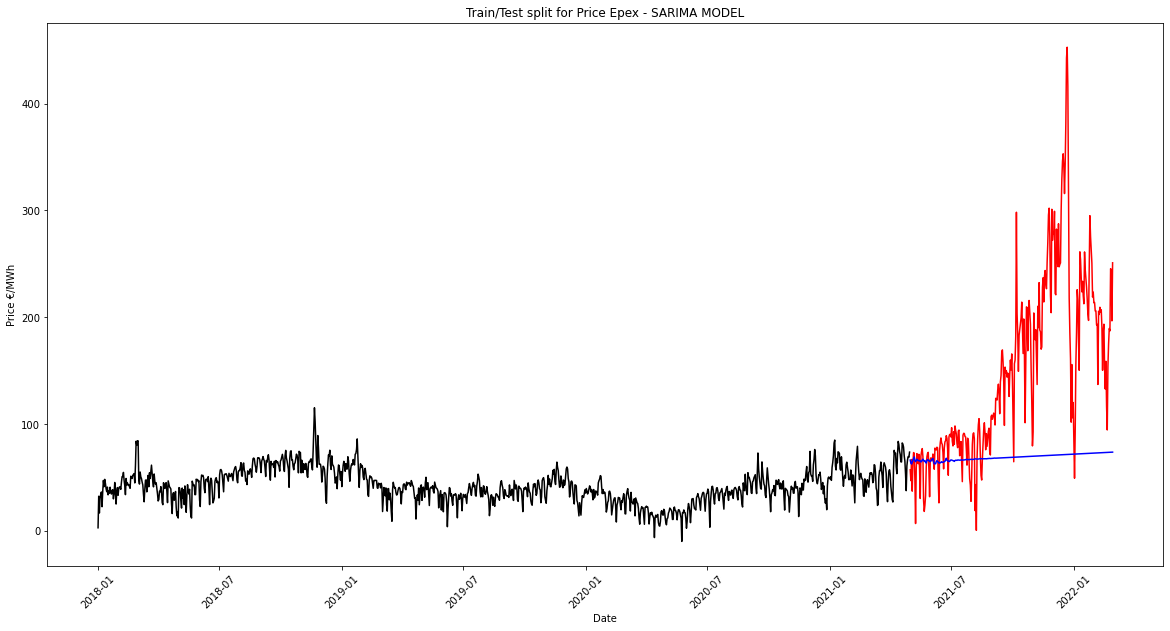

In [77]:
from statsmodels.tsa.arima.model import ARIMA
fig = plt.figure(1, figsize=(20, 10))

plt.plot(train['Date'],train['Price'], color = "black")
plt.plot(test['Date'],test['Price'], color = "red")
plt.ylabel('Price €/MWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Price Epex - SARIMA MODEL")

plt.plot(test['Date'],y_pred_out, color='Blue', label = 'SARIMA Predictions')


C:\Users\KL6269\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  113.76893501098023


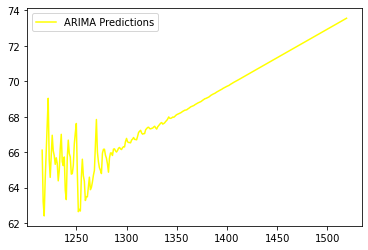

In [78]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2),seasonal_order = (5,0,0,12))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["Price"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

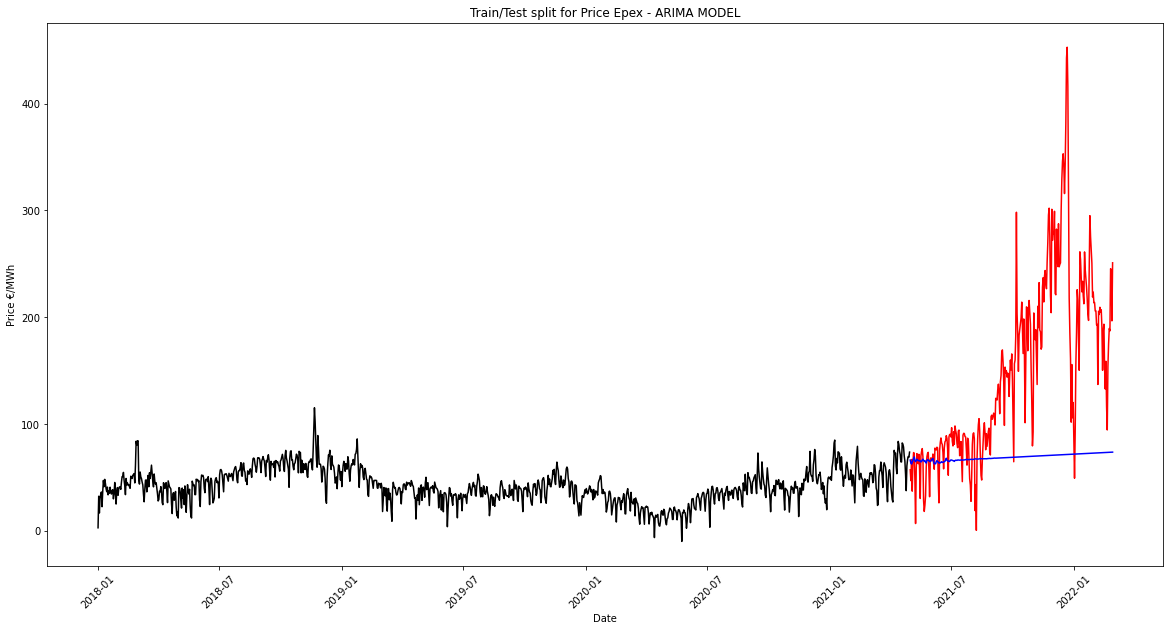

In [79]:
fig = plt.figure(1, figsize=(20, 10))

plt.plot(train['Date'],train['Price'], color = "black")
plt.plot(test['Date'],test['Price'], color = "red")
plt.ylabel('Price €/MWh')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Price Epex - ARIMA MODEL")

plt.plot(test['Date'],y_pred_out, color='Blue', label = 'SARIMA Predictions')


# Test seasonality

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose

data_orig.set_index('Date', inplace=True)

analysis = data_orig[['Montreal_Median_Price']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

NameError: name 'data_orig' is not defined

In [ ]:
fig = plt.figure(1, figsize=(20, 10))
plt.hist(train['Price'], bins =50 ,color = 'red', rwidth = 0.9) 
plt.title('Period 1 2018-01 to 2021-06 : Histogram electricity price ')
plt.xlabel('Electricity price')

In [ ]:
plt.hist(test['Price'])

In [ ]:
print('Period 1 : 2018-01 - 2021-06')
test['Price'].describe()

In [ ]:

print('Period 2 : 2021-06 - 2022-02')
train['Price'].describe()

In [ ]:
train.index = pd.to_datetime(train['Date'],format='%m/%d/%y %I:%M%p')
train

In [ ]:
train_2 = train['Price'].groupby(pd.Grouper(freq='M')).mean()

In [ ]:
train_2 = pd.DataFrame(train_2)
train_2 

In [ ]:
train_ = train.set_index("Date")
train_

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(train_2 )
result.plot()

In [ ]:
result